In [1]:
# Importing the libraries

import pandas as pd # Importing pandas for data manipulation and analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
from sklearn import preprocessing
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
data = pd.read_excel("/content/glass.xlsx", sheet_name = "glass")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
data.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [5]:
duplicates = data.duplicated()
duplicates.value_counts()

,count
False,213
True,1


In [6]:
data1 = data.drop_duplicates(keep=False)

In [7]:
duplicates = data1.duplicated()
duplicates.value_counts()

,count
False,212


In [8]:
data1.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,1.518330,13.400283,2.673821,1.454104,72.659245,0.500708,8.951179,0.176698,0.057547,2.797170
std,0.003029,0.816704,1.444965,0.492482,0.773423,0.654181,1.428624,0.499277,0.097740,2.106499
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516517,12.897500,2.037500,1.190000,72.310000,0.130000,8.237500,0.000000,0.000000,1.000000
50%,1.517670,13.295000,3.480000,1.365000,72.800000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519120,13.802500,3.600000,1.630000,73.092500,0.610000,9.142500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
data2= data1.copy()

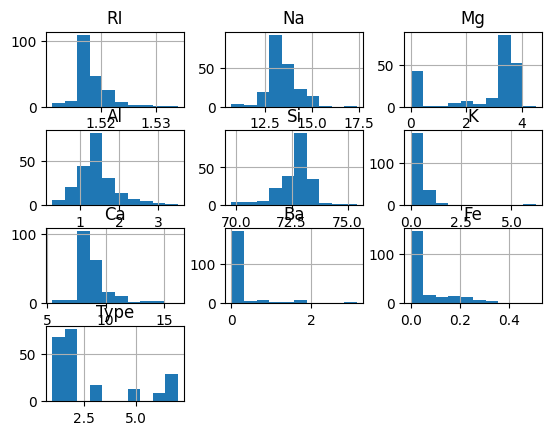

In [10]:
data2.hist()
plt.rcParams.update({'figure.figsize':(25,12), 'figure.dpi':100})

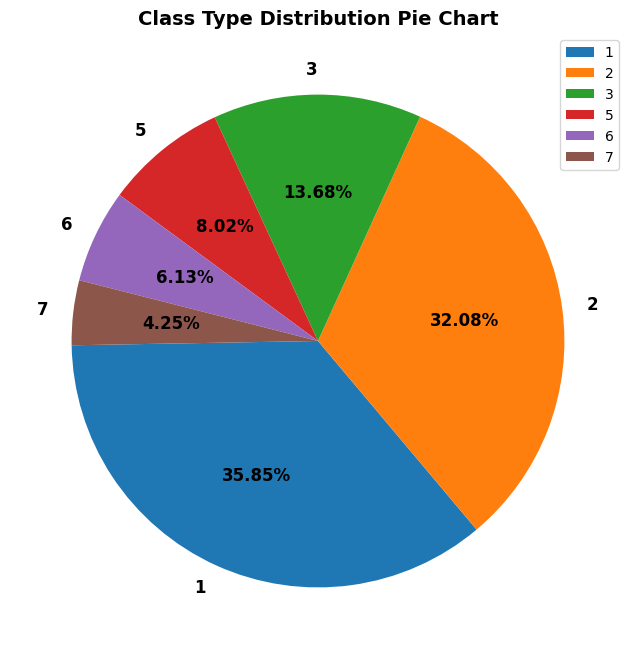

In [11]:
plt.figure(figsize=(10, 8))
plt.pie(data2['Type'].value_counts(), labels=data2.Type.unique(),
        autopct='%.2f%%', startangle=181, textprops={'size': 'large', 'fontweight': 'bold', 'color': 'black'})
plt.legend(loc='upper right')
plt.title("Class Type Distribution Pie Chart", fontsize=14, fontweight='bold')
plt.show()

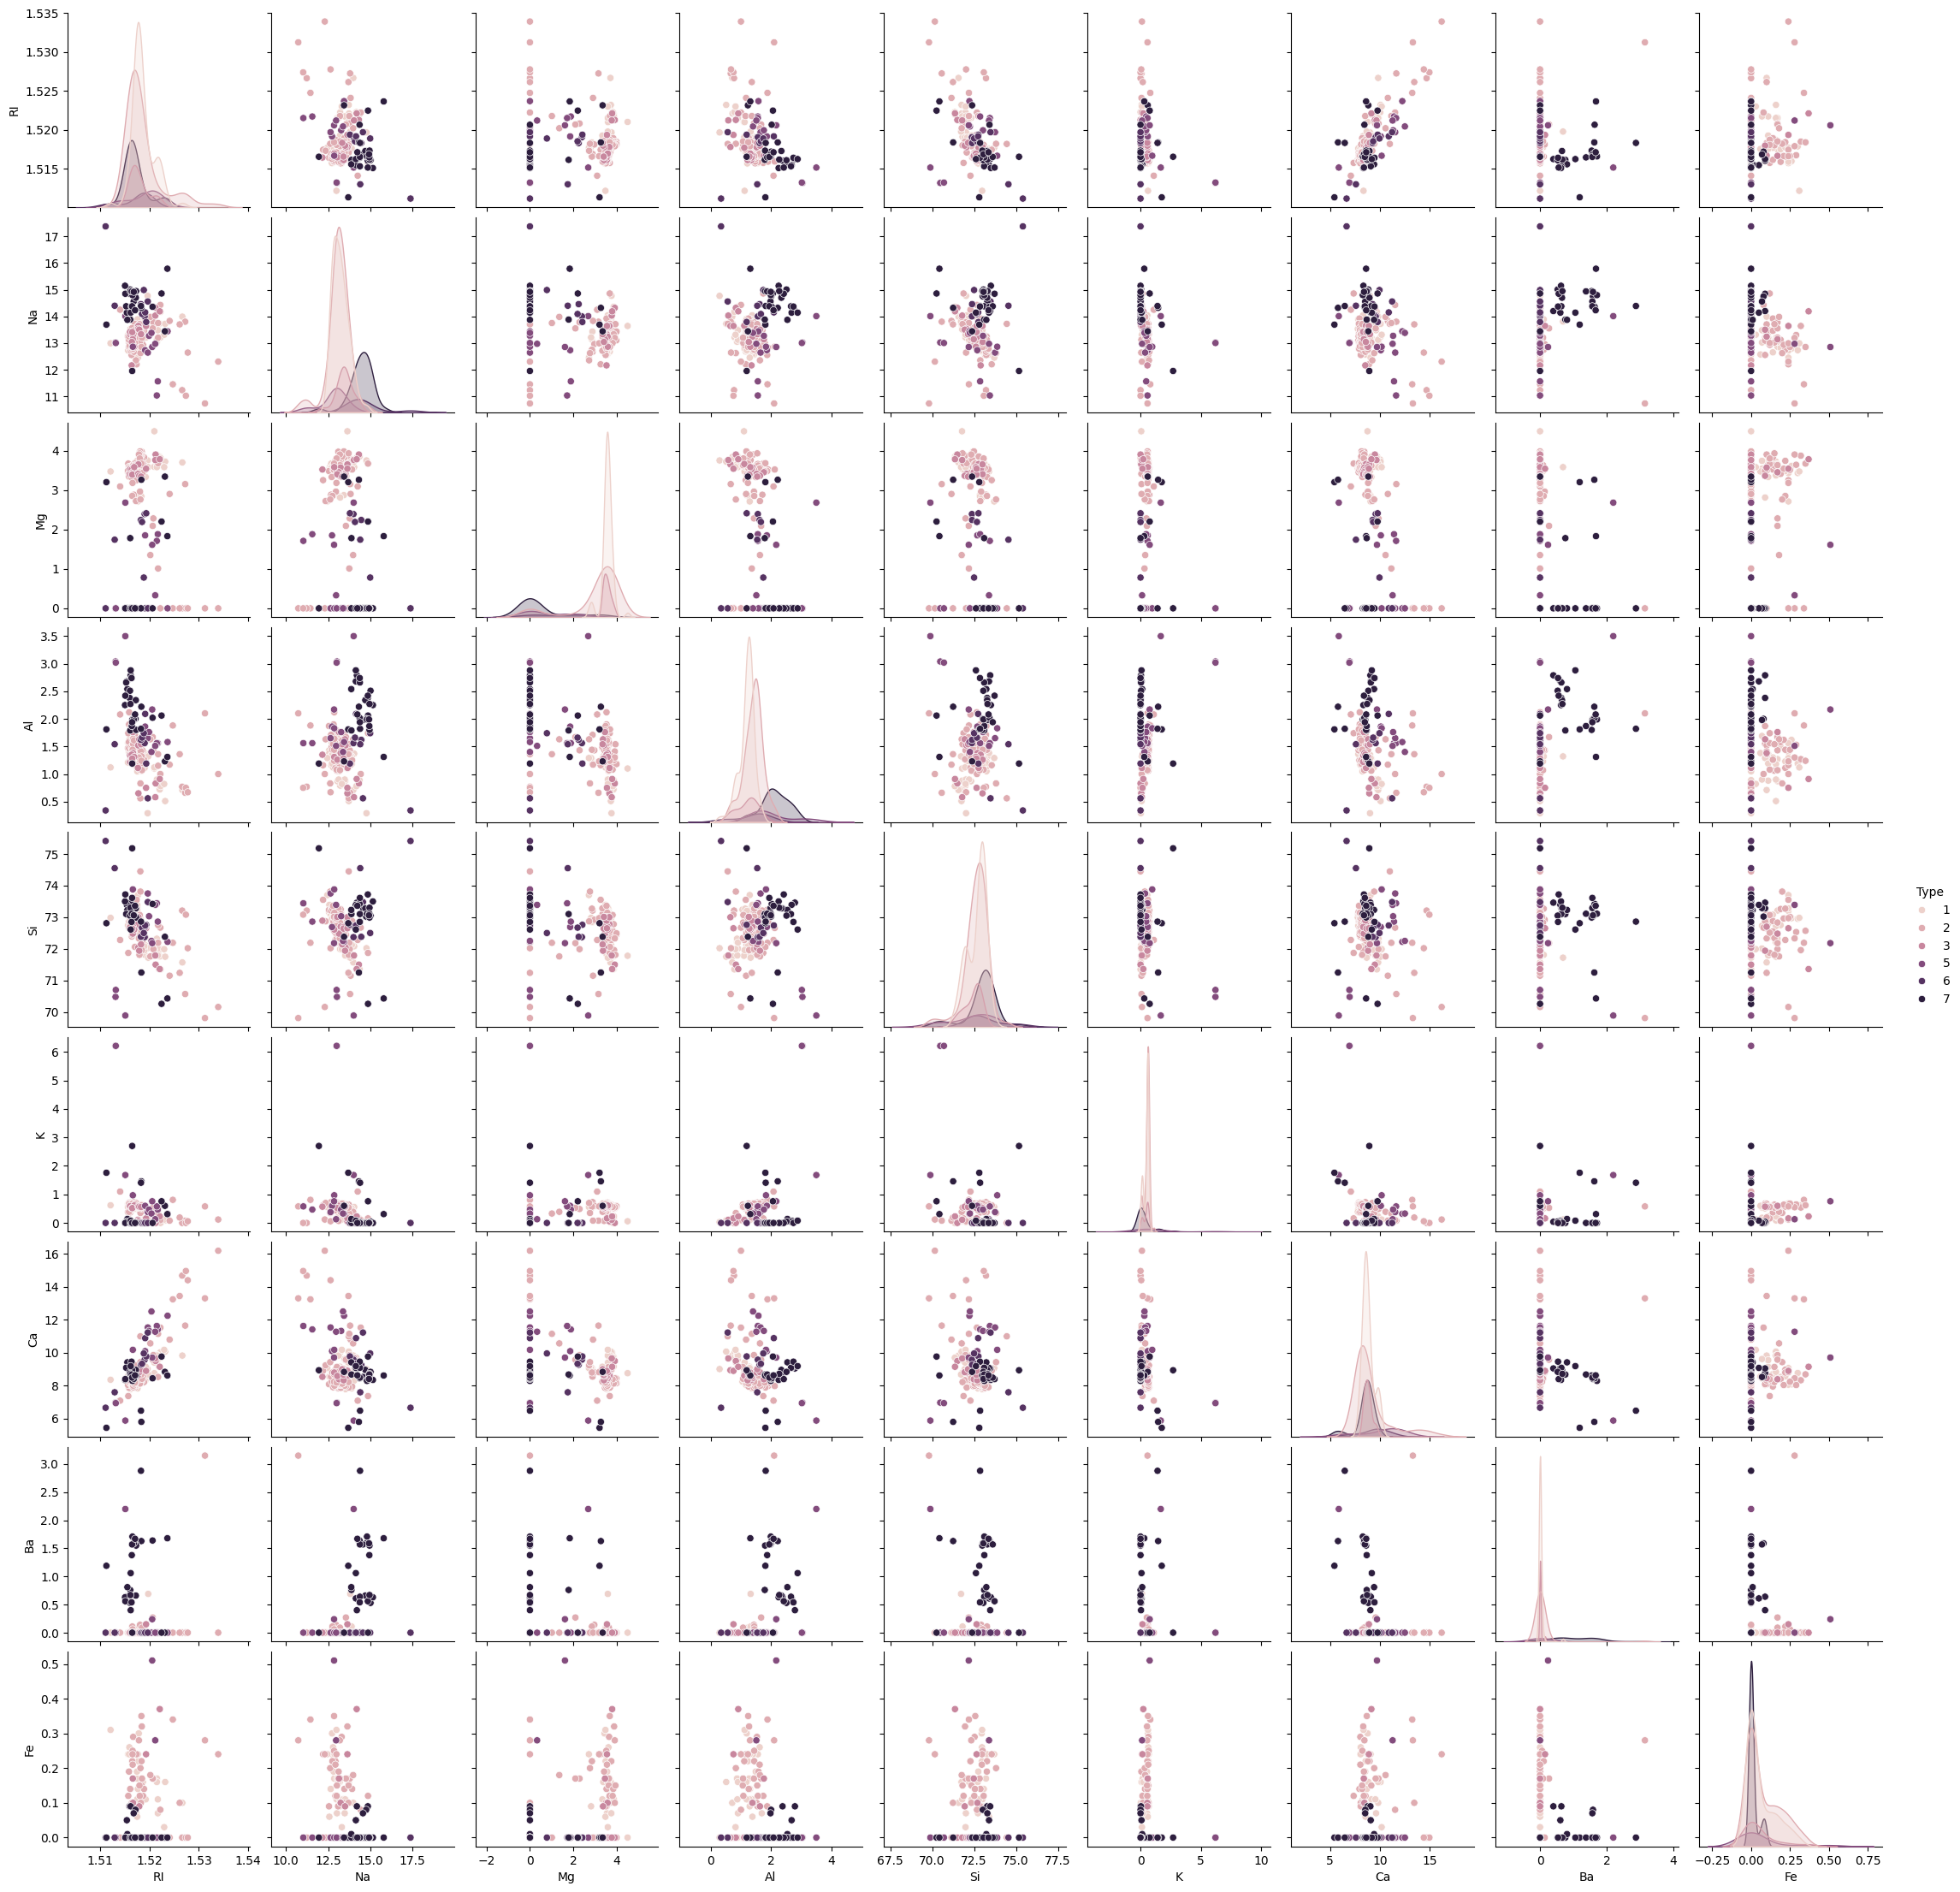

In [12]:
sns.pairplot(data2, hue='Type')

In [13]:
correlation = data2.corr()
correlation. style. background_gradient (cmap = 'BrBG')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.205868,-0.132883,-0.394406,-0.535877,-0.285419,0.811986,0.003780,0.151233,-0.155960
Na,-0.205868,1.000000,-0.283188,0.179045,-0.059860,-0.262199,-0.280987,0.331594,-0.237371,0.514880
Mg,-0.132883,-0.283188,1.000000,-0.477312,-0.158882,0.009869,-0.448677,-0.491368,0.087825,-0.743385
Al,-0.394406,0.179045,-0.477312,1.000000,-0.027235,0.321362,-0.256519,0.481955,-0.086955,0.596025
Si,-0.535877,-0.059860,-0.158882,-0.027235,1.000000,-0.201301,-0.205532,-0.106665,-0.101294,0.143812
K,-0.285419,-0.262199,0.009869,0.321362,-0.201301,1.000000,-0.316219,-0.044699,-0.011047,-0.014890
Ca,0.811986,-0.280987,-0.448677,-0.256519,-0.205532,-0.316219,1.000000,-0.111567,0.127676,0.004426
Ba,0.003780,0.331594,-0.491368,0.481955,-0.106665,-0.044699,-0.111567,1.000000,-0.060778,0.574628
Fe,0.151233,-0.237371,0.087825,-0.086955,-0.101294,-0.011047,0.127676,-0.060778,1.000000,-0.193944
Type,-0.155960,0.514880,-0.743385,0.596025,0.143812,-0.014890,0.004426,0.574628,-0.193944,1.000000


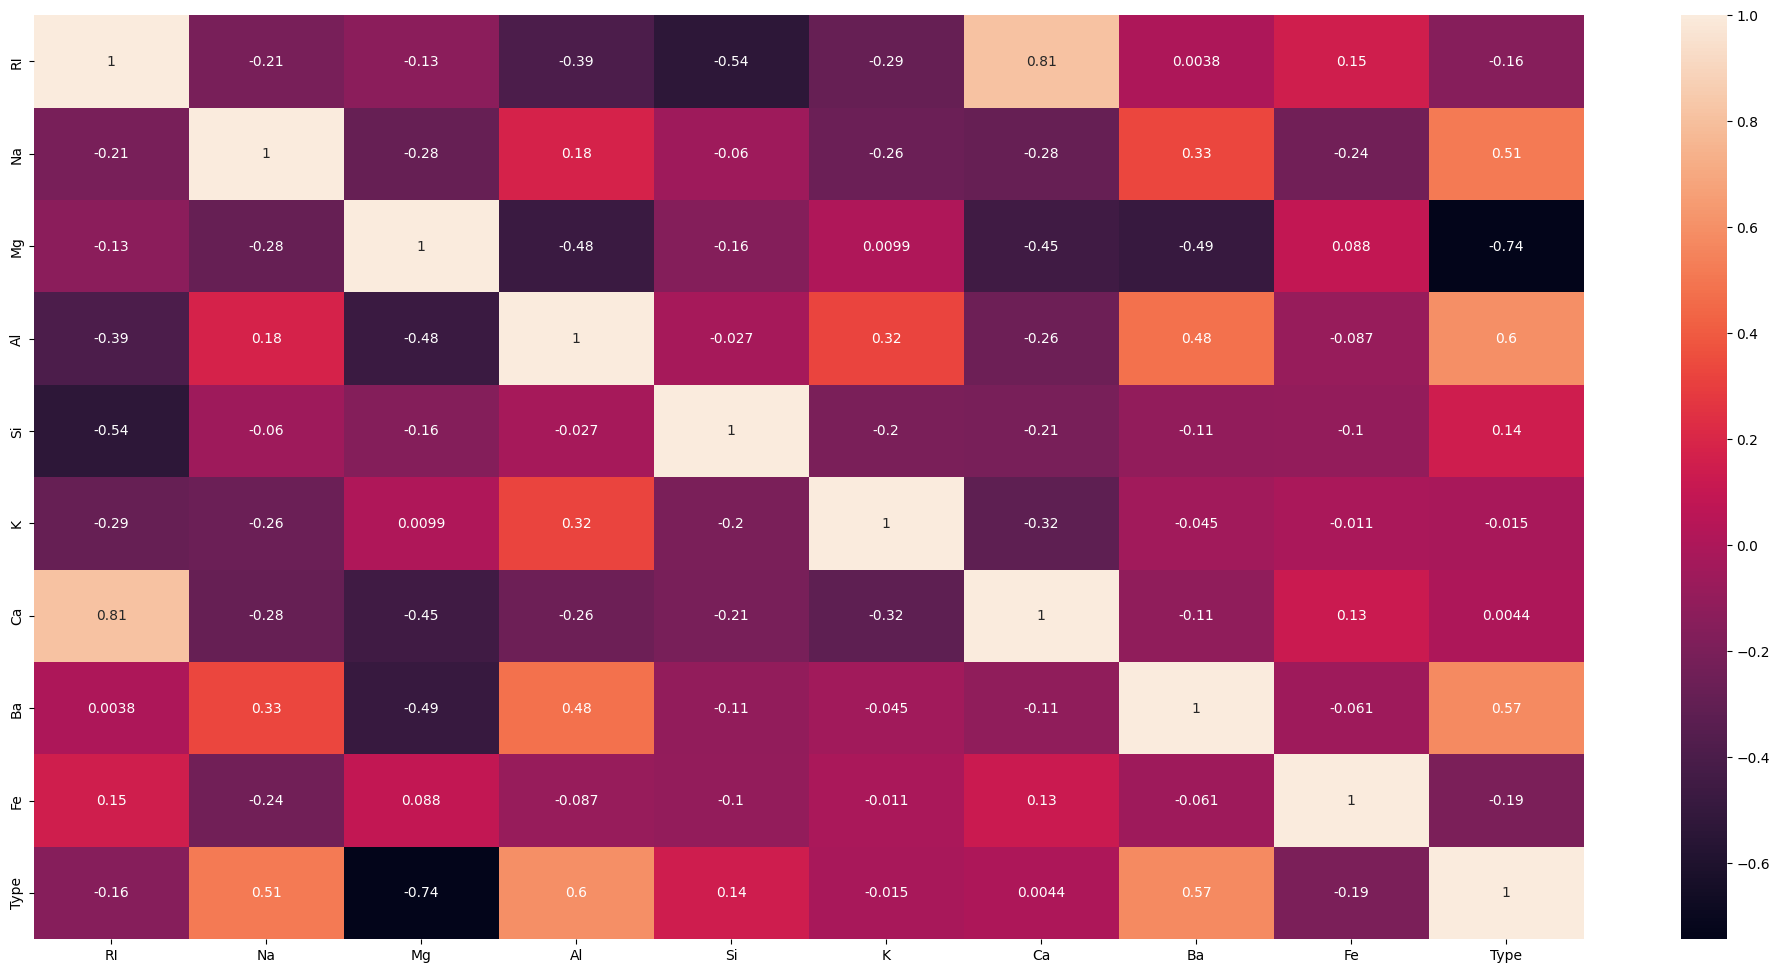

In [14]:
data2 = np.random.randint(low=1,
                         high=100,
                         size=(10, 10))
# plotting the heatmap
hm = sns.heatmap(data=correlation,
                annot=True)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

# displaying the plotted heatmap
plt.show()

In [15]:
def get_correlated_feature_pairs(data, threshold=0.5):

    corr_matrix = data.corr().abs()  # Compute the absolute correlation matrix
    n_features = corr_matrix.shape[0]  # Number of features

    correlated_pairs = []  # List to store correlated feature pairs

    # Iterate through upper triangle of correlation matrix
    for i in range(n_features):
        for j in range(i+1, n_features):
            if corr_matrix.iloc[i, j] >= threshold:
                correlated_pairs.append((corr_matrix.index[i], corr_matrix.columns[j]))

    return correlated_pairs

In [16]:
correlated_pairs = get_correlated_feature_pairs(correlation, threshold=0.5)
print("Correlated Feature Pairs:")
for pair in correlated_pairs:
    print(pair)

Correlated Feature Pairs:
('RI', 'Al')
('RI', 'Si')
('RI', 'Ca')
('Na', 'Mg')
('Na', 'Al')
('Na', 'Ba')
('Na', 'Fe')
('Na', 'Type')
('Mg', 'Al')
('Mg', 'Ba')
('Mg', 'Type')
('Al', 'Ba')
('Al', 'Type')
('Ba', 'Type')
('Fe', 'Type')


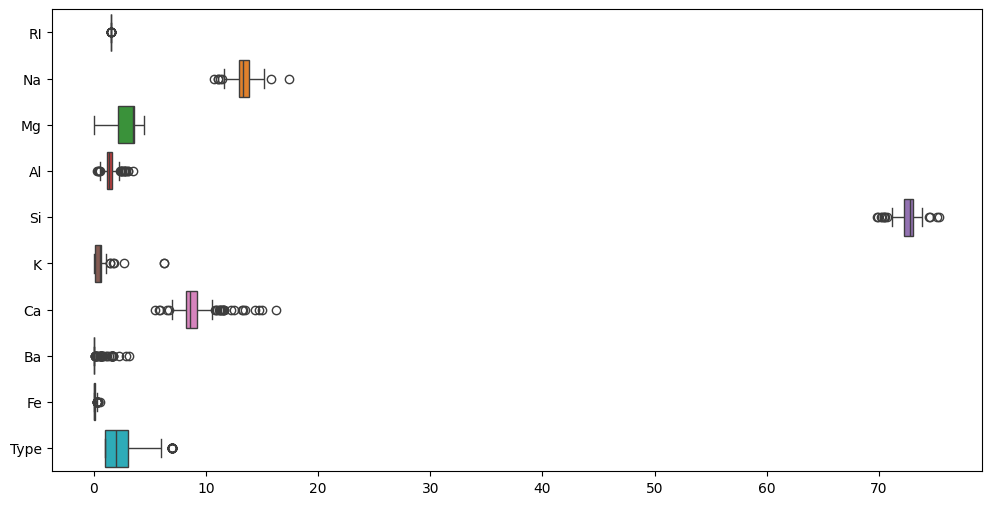

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data, orient="h")
plt.show()

In [18]:
x = data1.drop('Type',
               axis = 1)
y = data1['Type']


In [19]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [20]:
y

,Type
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=25)

In [22]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [23]:
ypred=rfc.predict(X_test)
ypred

array([2, 2, 2, 1, 7, 5, 2, 1, 2, 5, 2, 1, 1, 1, 2, 2, 3, 2, 5, 3, 2, 1,
       7, 7, 2, 1, 5, 1, 1, 2, 1, 6, 1, 2, 1, 2, 7, 1, 6, 2, 5, 3, 2, 1,
       6, 2, 2, 3, 2, 1, 7, 1, 1, 3, 1, 2, 2, 3, 2, 1, 1, 1, 7, 2])

In [24]:
pd.crosstab(y_test,ypred)

col_0,1,2,3,5,6,7
Type,,,,,,
1,16,2,2,0,0,0
2,4,21,2,2,1,0
3,0,0,2,0,0,0
5,0,0,0,3,0,0
6,0,0,0,0,2,0
7,1,0,0,0,0,6


In [25]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred)

0.78125

In [26]:
# Create the base classifier
base_classifier = RandomForestClassifier()

# Number of base models (iterations)
n_estimators = 10

# Create the Bagging classifier
bagging_classifier = BaggingClassifier(estimator=base_classifier, n_estimators=n_estimators)

# Train the Bagging classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.75


In [27]:
# Instantiate Gradient Boosting Regressor
gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
# Fit to training set
gbc.fit(X_train, y_train)

# Predict on test set
pred_y = gbc.predict(X_test)

# accuracy
acc = accuracy_score(y_test, pred_y)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))

Gradient Boosting Classifier accuracy is : 0.77
